In [1]:
# H0 - Vaccines don't reduce the amount of infant deaths
# H1 - Vaccines reduce the amount of infant deaths

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [160]:
df = pd.read_csv('refined_life_expect.csv')
df.dropna(inplace=True)
grouped_df = df.groupby(['country']).agg({'life_expectancy': 'mean', 'alcohol': 'mean',
                                                           'hepatitisB': 'mean', 'bmi': 'mean',
                                                           'measles': 'mean', 'polio': 'mean',
                                                           'polio': 'mean', 'diphtheria': 'mean',
                                                           'hiv': 'mean', 'total_expenditure': 'mean',
                                                           'gdp': 'mean', 'thinness_till19': 'mean',
                                                           })
grouped_df.shape
columns = grouped_df

AttributeError: Cannot access attribute 'shape' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [162]:
quantile_vals = df.quantile(0.95)

for ind in range(len(quantile_vals)):
    try:
        clean_df = df[df[columns[ind]] > quantile_vals[ind]]
    except:
        contine
        

clean_df

,Unnamed: 0,country,life_expectancy,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,total_expenditure,gdp,thinness_till19,status,inf_death,population,death_ratio


In [145]:
id_lr_model = ols(formula='life_expectancy~alcohol+hiv+bmi+polio+measles+thinness_till19+hepatitisB+diphtheria+gdp', data=grouped_df).fit()
id_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     63.34
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           6.01e-42
Time:                        11:44:36   Log-Likelihood:                -363.29
No. Observations:                 133   AIC:                             746.6
Df Residuals:                     123   BIC:                             775.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          47.0105      2.499     18.812      0.000      42.064      51.957
alcohol            -0.0787      0.128     -0.614      0.540      -0.332       0.175
hiv                -0.6650      0.072     -9.291      0.000      -0.807      -0.523
bmi                 0.2631      0.036      7.354      0.000       0.192       0.334
polio               0.0241      0.058      0.418      0.677      -0.090       0.139
measles          6.786e-05   4.95e-05      1.371      0.173   -3.01e-05       0.000
thinness_till19     0.1319      0.120      1.095      0.276      -0.106       0.370
hepatitisB         -0.0458      0.034     -1.342      0.182      -0.113       0.022
diphtheria          0.1563      0.058      2.679      0.008       0.041       0.272
gdp                 0.0003   5.29e-05      4.906      0.000       0.000       0.000
==============================================================================
Omnibus:                       15.049   Durbin-Watson:                   2.247
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.928
Skew:                          -0.700   Prob(JB):                     0.000128
Kurtosis:                       4.129   Cond. No.                     7.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
X = grouped_df[['hiv', 'bmi','gdp','diphtheria']].values
y = grouped_df.life_expectancy.values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
print(model.intercept_)
print(model.coef_)

[48.29076811]
[[-6.72614237e-01  2.30666911e-01  2.42866051e-04  1.43214889e-01]]


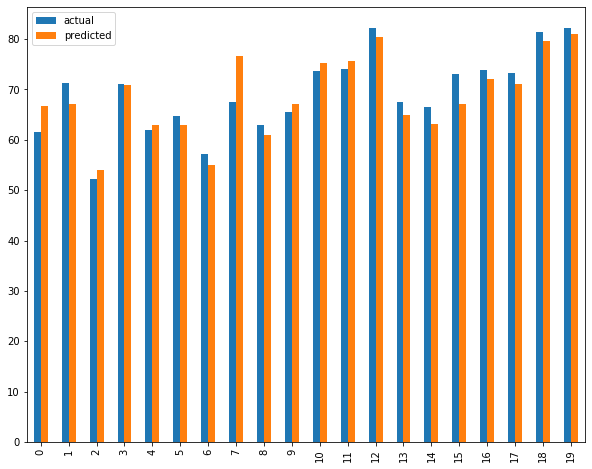

In [113]:
y_predict = model.predict(x_test)
new_df = pd.DataFrame({'actual': y_test.flatten(), 'predicted': y_predict.flatten()})
new_df
plot_df = new_df.head(20)
plot_df.plot(kind='bar', figsize=(10,8))

In [114]:
print('mean absolete error:', metrics.mean_absolute_error(y_test, y_predict))
print('mean squared error:', metrics.mean_squared_error(y_test, y_predict))
print('root squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

mean absolete error: 2.594139915811462
mean squared error: 10.374097755060363
root squared error: 3.22088462305938
